<a href="https://colab.research.google.com/github/YOUCHAERIN/python-practice/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉호 생존자 데이터 분석
어떤 사람들이 생존할 가능성이 더 높을까?

---

https://www.kaggle.com/c/titanic

칼럼 정보
* Survival : 생존 여부
* Pclass : 티켓의 클래스
* Name : 탑승자 이름
* Sex : 성별
* Age : 나이
* Sibsp : 탐승한 형제자매, 배우자의 수
* Parch : 탑승한 부모, 자녀의 수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 케빈 번호
* Embarked : 승선지 (항구)

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import pandas as pd

train = pd.read_csv('/gdrive/My Drive/220205/titanic_data/train.csv')
test = pd.read_csv('/gdrive/My Drive/220205/titanic_data/test.csv')

# 데이터 탐색

#### 탐색적 데이터 분석

탐색적 데이터 분석 과정에서 데이터의 모든 것을 이해하려고 부담스럽게 접근할 필요는 없습니다.
<br>일부 행을 간단히 출력하여 훑어보며 단계적으로 데이터에 익숙해지세요.
<br>탐색적 데이터 분석에서는 데이터가 어떻게 생겼는지, 어떤 변수들이 존재하는지, 어떤 타입을 가지고 있는지 등의 느낌을 보는 것으로 충분합니다.

In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train.shape

(891, 12)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# info() : pandas에서 자동으로 정보를 요약해주는 메서드
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum() # 빠진 항목 개수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 몸풀기 미션 : `test.csv`에 대해서 탐색해보기

## 시각화로 데이터 살펴보기

In [10]:
# 위 내용을 참고해서 스스로 작성해봅시다!
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 그래프를 그리기 위한 라이브러리 임포트

In [3]:
import matplotlib.pyplot as plt

In [15]:
# 한글 깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [4]:
plt.rc('font', family='NanumBarunGothic')

### 선실별 승객 비율 살펴보기

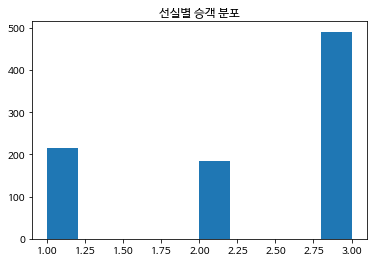

In [5]:
plt.title("선실별 승객 분포")
plt.hist(x = train['Pclass'])
plt.show()

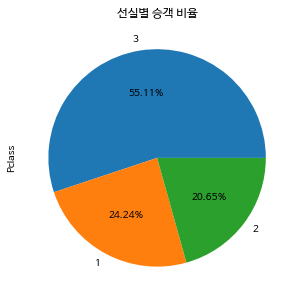

In [6]:
# 선실별 승객 비율 - 파이차트
plt.title("선실별 승객 비율")
pclass_plt = train['Pclass'].value_counts() # pclass_plt라는 변수에 train데이터의 pclass열의 각 값을 카운팅해서 저장합니다.
pclass_plt.plot(kind='pie', autopct='%.2f%%', figsize=(10, 5)) # 소수점 둘째자리까지 %와 함께 출력, 표 크기 지정
plt.show()

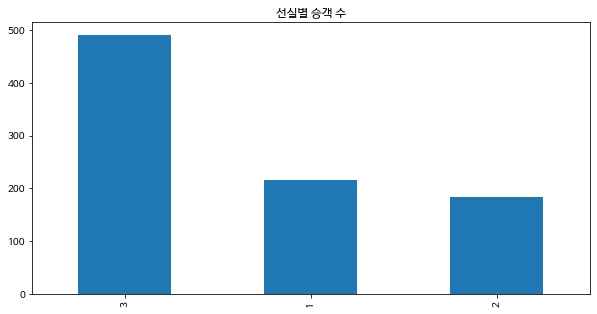

In [7]:
# 선실별 승객 수 - 바차트

plt.title("선실별 승객 수")

pclass_plt = train['Pclass'].value_counts() # pclass_plt라는 변수에 train데이터의 pclass열의 각 값을 카운팅해서 저장합니다.
pclass_plt.plot(kind='bar', figsize=(10, 5))
plt.show()

### 그래프 그리는 함수 만들기 

그래프를 뚝딱 그려주는 함수를 만들어 봅시다. 함수란 반복적으로 사용되는 가치 있는 부분을 한 뭉치로 묶어서 어떤 입력값을 주었을 때 어떤 결과값을 돌려주는 것. 각종 그래프별로 미리 함수를 만들어두었으니 편하게 사용해서 그래프를 그려봅시다.

#### 선 그래프

In [8]:
def chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(figsize=(10, 5))

#### 막대 그래프

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

* kind=bar : 막대 그래프로 출력 <br>
* stack : 막대를 스택 형태로 표현할지 여부 <br>
* figsize : 그래프 사이즈 조절

어떤 feature 즉 어떤 요소가 생존에 영향을 주었는지를 파악할 수 있도록 그래프로 그려주고 있다. <br>
예를 들어 나이라는 요소를 함수에 입력 값으로 집어 넣으면 이 함수는 나이가 n살인 사람들 중 생존자와 사망자를 각각 카운팅해서 그래프로 그려주고 있다.

#### 파이차트

In [10]:
def pie_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(10, 5))

#### 히스토그램

In [11]:
def hist_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='hist', figsize=(10, 5))

#### 박스 그래프

In [12]:
def box_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='box', figsize=(10, 5))

#### 밀도 그래프

In [13]:
def kde_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='kde', figsize=(10, 5))

아직 def를 통해 함수를 정의하는 단계이고, 호출하지 않았기 때문에 그래프는 보이지 않는다. <br>
파이차트, 히스토그램, 박스그래프, 밀도그래프 주요 내용은 다 같고 그래프 형식만 다른 것을 확인할 수 있다.

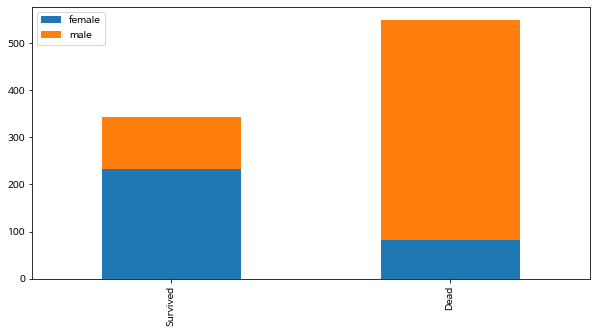

In [14]:
bar_chart('Sex')

* 간단 결론 : 여자는 남자보다 살아날 확률이 높았다.

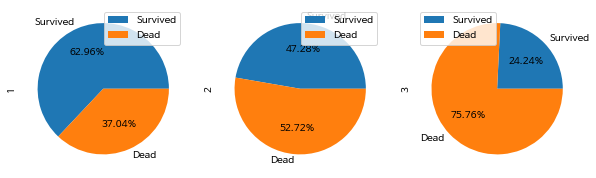

In [15]:
pie_chart('Pclass')

* 간단 결론 : 타이타닉호의 등급이 생존에 영향을 주었다. 더 좋은 칸일수록 더 많이 살아남았다.

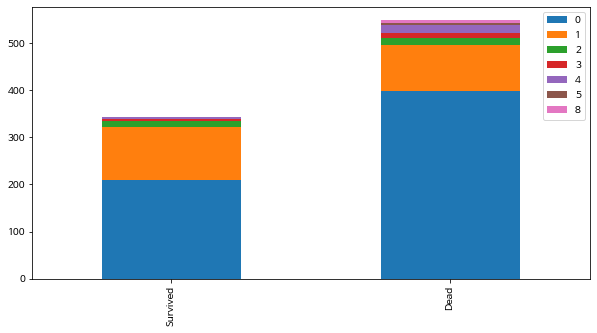

In [16]:
bar_chart('SibSp')

* 간단 결론 : 형제나 배우자가 있을 때 더 많이 살았다.

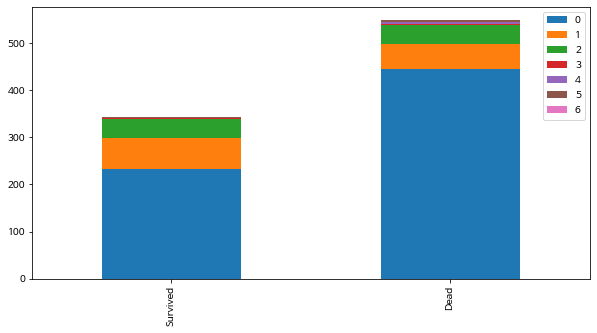

In [17]:
bar_chart('Parch')

* 간단 결론 : 부모님이나 자식이 있을 때 더 많이 살았다.

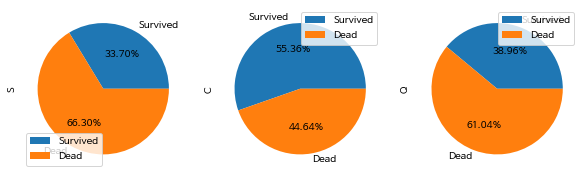

In [18]:
pie_chart('Embarked')

* 간단 결론 : C 선착장에서 탑승한 사람은 생존율이 특히 높다.

그러나 하나의 특성과 생존비율 만을 생각해서 예측하기에는 무리가 있다. <br>

예를 들어 높은 금액의 티켓을 산 부유한 사람이 가족들이랑 왔을 경우가 많다고 가정해본다면, 가족들과 함께 왔다고 해서 살 가능성이 높다고 할 수는 없다. <br>

따라서 단일 특성을 가지고 생존 확률을 예측하기보단 여러가지 특성을 종합해서 예측을 하는 것이 더 좋을 것이다.

#### 여러가지 feature 값 기준으로 그래프를 그려보기

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 여기에서 함수 호출하기
def pie_chart2(feature):
    first=train[train['Pclass'==1]][feature].value_counts()
    second=train[train['Pclass'==2]][feature].value_counts()
    third=train[train['Pclass'==3]][feature].value_counts()
    df = pd.DataFrame([first,second,third])
    df.index = ['First', 'Second','Third']
    df.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(10, 5))

In [35]:
pie_chart2('Embarked')

KeyError: ignored

# Feature Engineering

feature Engineering : 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 특징(Feature)를 만들어내는 과정

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 이름이 생존과 연관이 있었을까?

In [37]:
train_test_data = [train, test] # train과 test 데이터 합치기
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [40]:
type(train_test_data)

list

In [38]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [41]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [42]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

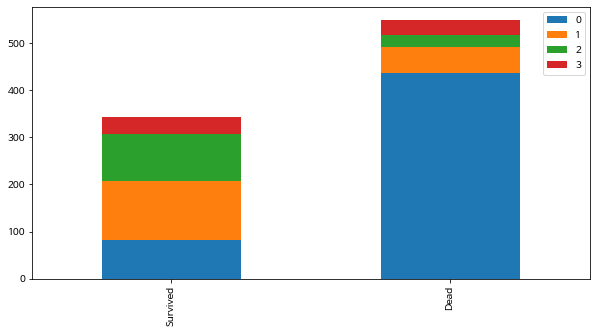

In [48]:
bar_chart('Title')

결론: 이름은 생존과 연관이 있었다.

### Age 값 채우기

In [44]:
# 빠진 항목 개수 알아보기

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Age는 누락값이 많이 존재함. 이를 채우는 방법에 대해서 생각해보자.
1. 누락값에 전체 나이 평균을 넣어준다.
2. 누락값에 남성, 여성 별로 분류하여 평균 나이를 넣어준다.

In [45]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [46]:
# 빠진 항목 개수 다시 알아보기

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

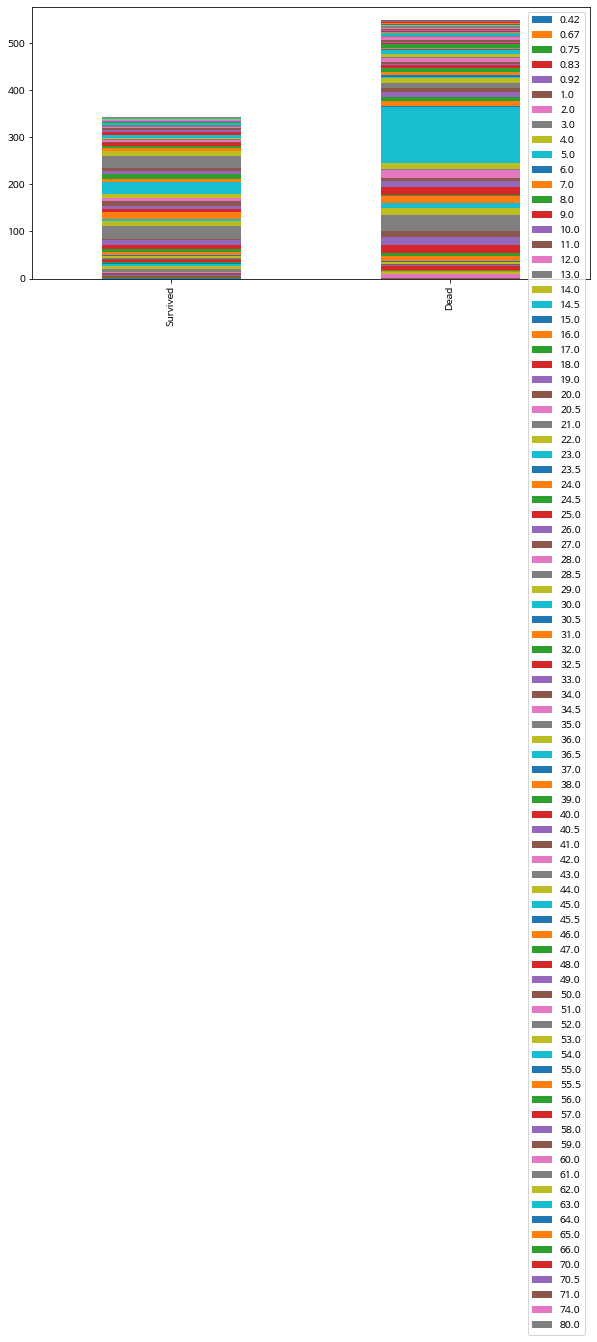

In [47]:
bar_chart('Age')

### Age Binning
나이를 그대로 그래프 차트에 넣으면 0살부터 80살까지 너무 많은 정보가 들어있다. 그래서 feature engineering에서 Binning이라는 기술이 있는데, 이렇게 잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법이다.

In [51]:

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0


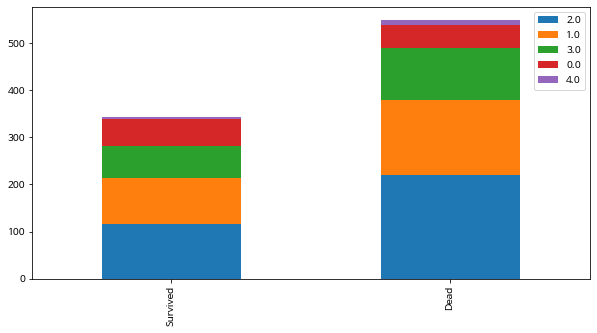

In [65]:
bar_chart('Age')

0에 해당하는 16세 이하 아이들의 경우 다른 그룹보다 생존률이 높음을 확인할 수 있다. 4에 해당하는 62세 이상의 어르신들은 사망률이 아주 높다는 것을 확인할 수 있다. 이렇게 Age information을 binning이라는 테크닉을 이용하여 좀 더 이해하기 쉽게 그래프로 보일 수 있고, classifier 하는데 조금 더 쉽게 예측할 수 있다

### Embarked 채우기

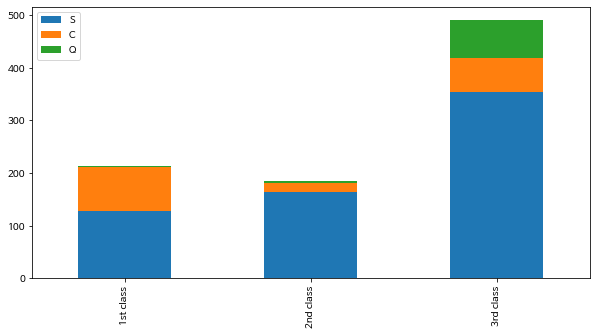

In [56]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
# 쌓인 모양의 bar 차트를 그려보자. 사이즈는 (10,5)
df.plot(kind='bar', stacked=True, figsize=(10, 5))

대부분 S 선착장에서 탔다. 빈 Embarked는 S로 채워넣어도 무방할 것으로 판단된다.

In [57]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0


### Fare

In [ ]:
bar_chart('Fare')

### Fare Binning

In [60]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
bar_chart('Fare')

간단 결론 : 티켓 가격이 저렴할수록 사망할 확률이 높았다.

# 미션 5
#### 데이터 분석, 인사이트 도출 보고서 작성


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,2.0,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,0.0,NaN,S,0


In [78]:
train.groupby('Pclass')['Sex'].count()

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64

##<나만의 인사이트 도출하기>
####앞서 살펴본 pie_chart만으로는 선착장마다 왜 생존율이 높은지 정확히 알 수 없다.
####pie_chart로 높은 등급에 탑승할수록 생존도가 높다는 것을 확인한 바 있는데,
####그렇다면, 탑승한 선착장마다 부유한 정도가 차이가 있을까? 

#####선착장마다 부유한 정도가 다르다(구매한 표 등급차) + 표의 등급에 따라 생존율이 달라진다
#####=선착장마다 부의 차이가 생존율로 이어졌다

######<앞서 살펴본 pie_chart>

In [85]:
def pie_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(10, 5))

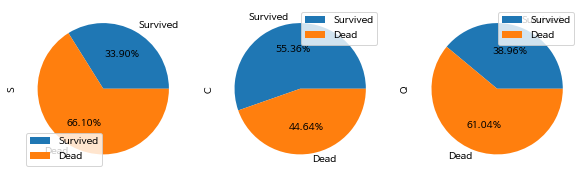

In [86]:
pie_chart('Embarked')

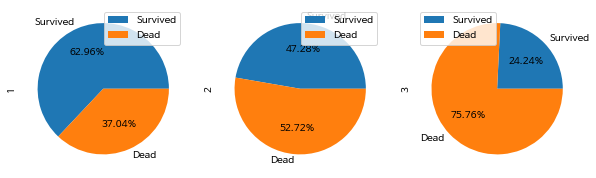

In [87]:
pie_chart('Pclass')

###<새로 추가작성한 함수>

In [79]:
# 여기에 작성해봅시다!
def pie_chart2(feature):
    first=train[train['Pclass']==1][feature].value_counts()
    second=train[train['Pclass']==2][feature].value_counts()
    third=train[train['Pclass']==3][feature].value_counts()
    df = pd.DataFrame([first,second,third])
    df.index = ['First', 'Second','Third']
    df.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(10, 5))

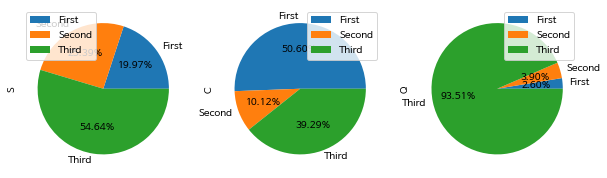

In [80]:
pie_chart2('Embarked')

###앞서 세운 가설이 사실임을 알 수 있음
####"선착장마다 부의 차이가 존재하고, 이는 곧 선착장의 생존율로 이어졌다"
########C선착장이 잘사는 동네인가보다...